In [103]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

In [4]:
plt.rcParams['figure.figsize'] = [20, 15]

In [5]:
filename = '../images/one_swath.csv'
swath = np.loadtxt(filename, delimiter=',')

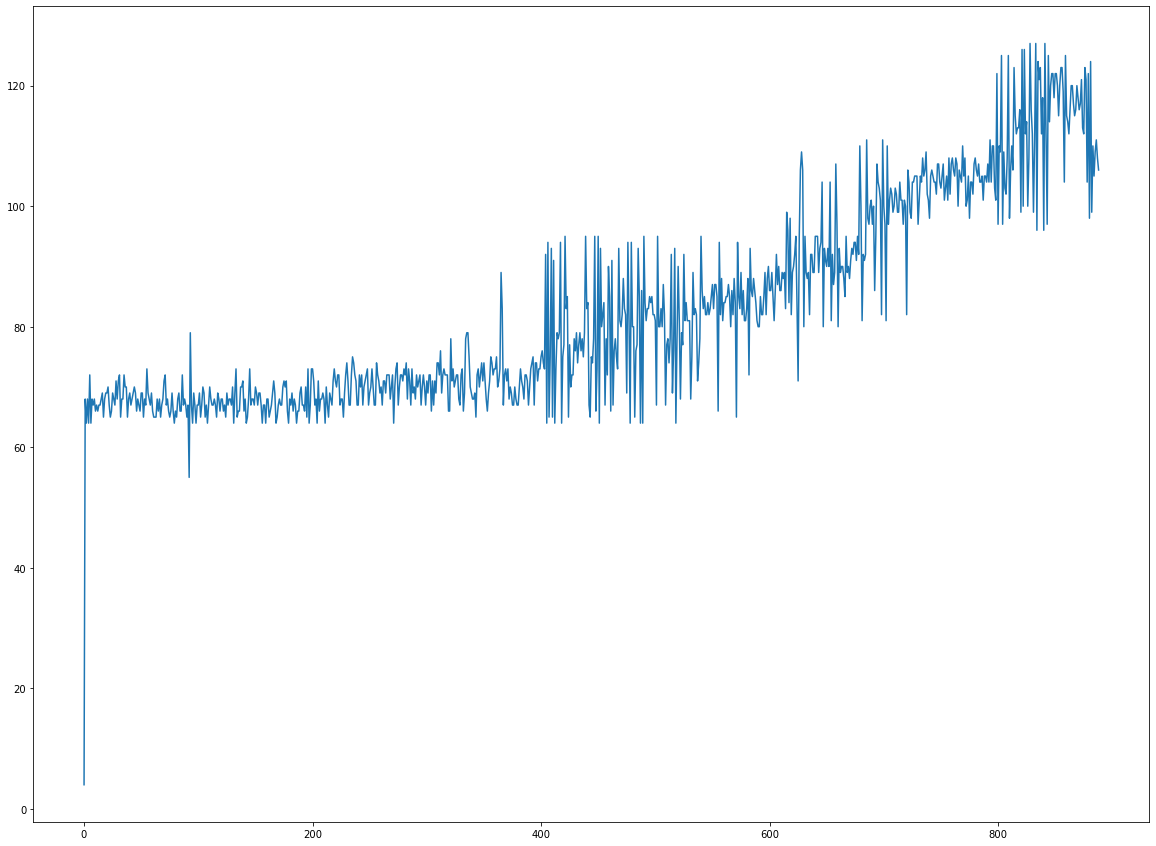

In [6]:
plt.plot(swath)

In [64]:
def bilateral_filter(data, sigma_c, sigma_s, radius=None):

    # make the radius of the filter equal to 4 standard deviations
    if radius == None:
        radius = int(4.0 * sigma_c + 0.5)
        
    # Skips all nan
    data = data[~np.isnan(data)]

    filtered_data = np.zeros(data.shape)

    for i in range(len(data)):
        j = np.arange(-radius, radius+1)

        # Reflecting the borders of the signal
        j = np.where(i + j < 0, -j, j)
        j = np.where(i + j > len(data)-1, -j, j)

        spatial_support = np.exp((-(j)**2)/(2*sigma_c**2))
        range_support = np.exp((-(data[i]-data[i+j])**2)/(2*sigma_s**2))
        filtered_data_point = np.sum(data[i+j] * spatial_support * range_support)
        normalization_factor = np.sum(spatial_support * range_support)
        filtered_data[i] = filtered_data_point / normalization_factor

    # plt.plot(data)
    # plt.plot(filtered_data)
    # plt.show()
    # input('Press any key to continue')

    return filtered_data

In [89]:
def speckle_reducing_bilateral_filter(data, sigma):

    # make the radius of the filter equal to 4.0 standard deviations
    radius = int(4.0 * sigma + 0.5)
    sigma2 = sigma * sigma
    x = np.arange(-radius, radius+1)
    spatial_support = np.exp(-0.5 / sigma2 * x ** 2)
    spatial_support = spatial_support / spatial_support.sum()
    
    data = data[~np.isnan(data)]

    filtered_data = np.zeros(data.shape)

    for i in range(len(data)):
        j = np.arange(-radius, radius+1)

        # Reflecting the borders of the signal
        j = np.where(i + j < 0, abs(j), j)
        j = np.where(i + j > len(data)-1, -j, j)

        alpha2 = data[i+j]**2
        range_support = (data[i] / alpha2) * np.exp((-data[i]**2)/(2*alpha2))
        filtered_data_point = np.sum(data[i+j] * spatial_support * range_support)
        normalization_factor = np.sum(spatial_support[j] * range_support)
        filtered_data[i] = filtered_data_point / normalization_factor

    # plt.plot(data)
    # plt.plot(filtered_data)
    # plt.show()
    # input('Press any key to continue')

    return filtered_data

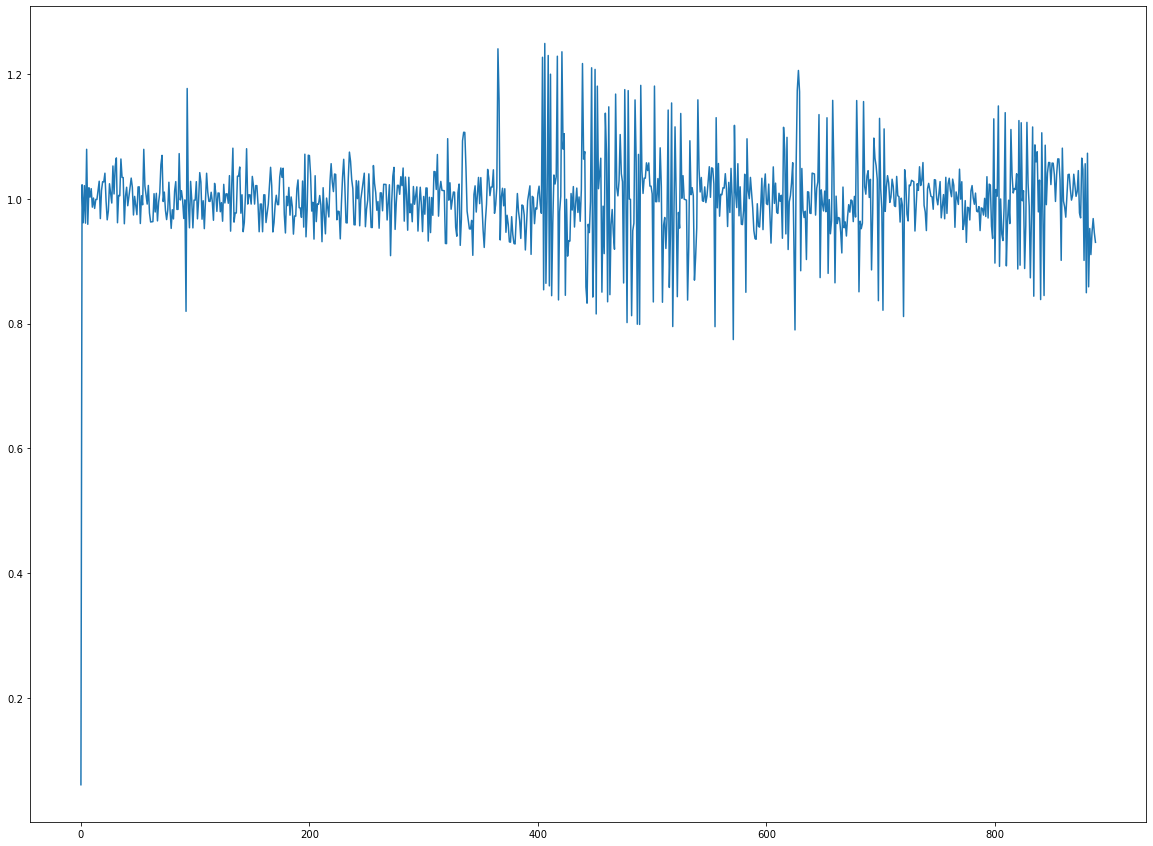

In [94]:
filtered_swath = bilateral_filter(swath,20.0, 100.0)
# filtered_swath = speckle_reducing_bilateral_filter(swath, 10.0)

corr_swath = swath[:889]/filtered_swath

#plt.plot(swath)
#plt.plot(filtered_swath)

plt.plot(swath[:889]/filtered_swath)

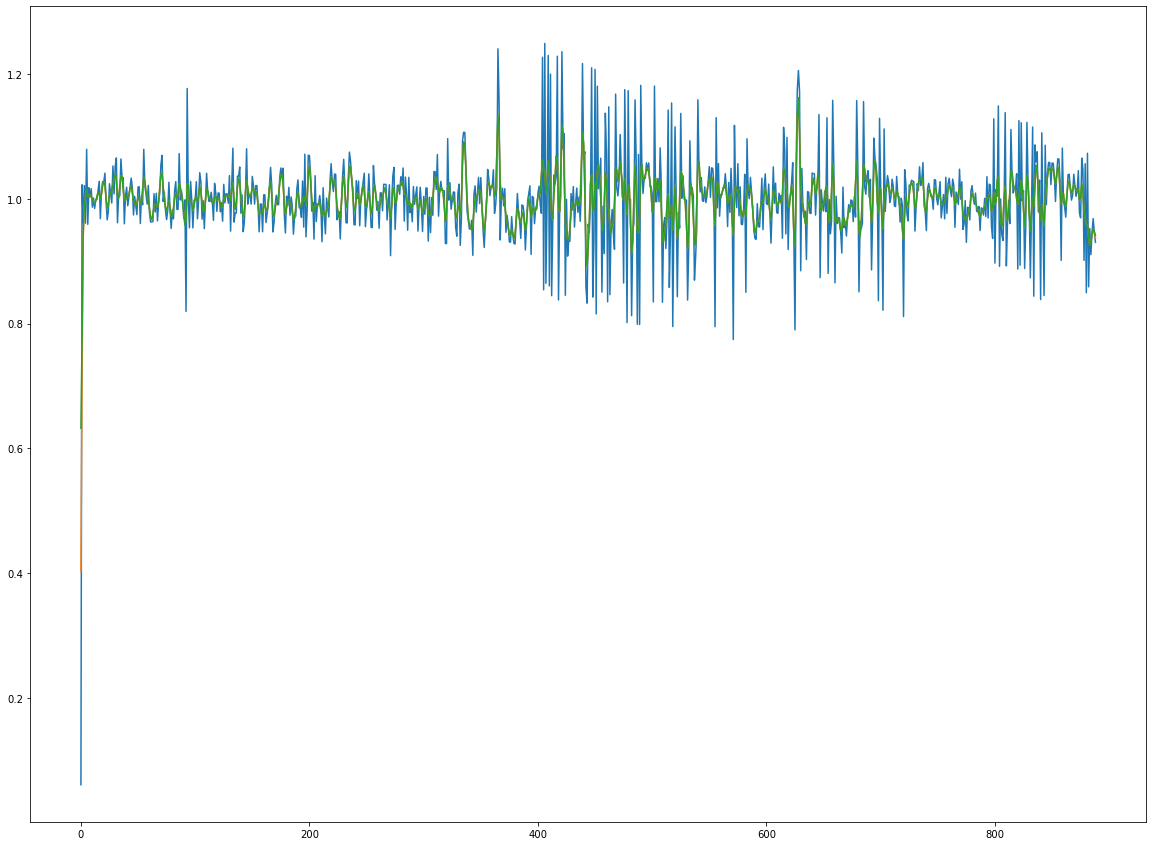

In [116]:
filt_corr_swath_bf = bilateral_filter(corr_swath,1.0, 100.0)
filt_corr_swath = gaussian_filter(corr_swath, 1.0)
plt.plot(corr_swath)
plt.plot(filt_corr_swath)
plt.plot(filt_corr_swath_bf)